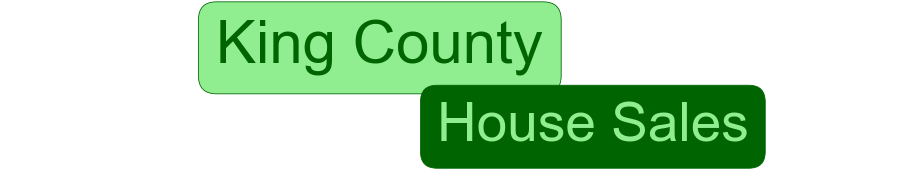

In [1]:
# Computations
import numpy as np
import pandas as pd

# Preprocessing
import datetime

## Geopandas
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mplleaflet
from shapely.geometry import Point, Polygon

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex, clear_output

# Maps
import folium
from folium import plugins
from folium.plugins import HeatMap

## seaborn
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})


## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17, 6)
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
%matplotlib inline


## missingno
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 1, figsize= (16,3))
_ = ax.text(0.4, .8, "King County", color = 'DarkGreen', size=60, rotation=0.,ha="center", va="center",
            bbox=dict(boxstyle="round", ec='DarkGreen',fc='LightGreen'))

_ = ax.text(.9, .4, "House Sales", size=55, color = 'LightGreen', rotation=0.,ha="right", va="top",
            bbox=dict(boxstyle="round", ec='DarkGreen',fc='DarkGreen'))
_ = ax.axis('tight')
_ = ax.axis('off')

# King County House Sales

In this study, we analyze and create statistical models using a dataset from [Kaggle.com](https://www.kaggle.com/shivachandel/kc-house-data). This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


<div class="alert alert-block alert-info">
<font size="+2"><b>
House Sales in King County Dataset
</b></font>
</div>


### Data Description

Online property companies offer valuations of houses using machine learning techniques. This report aims to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”
The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle*. This data was published/released under CC0*: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography. The dataset consisted of 21 variables and 21613 observations.

### Data Columns
Attribute Information (in order):
    
| Attribute | Information | Attribute | Information |
|-------------|------------------------------------|---------------|----------------------------------------------------------------|
| id | Identification number of the house | grade | Grade given to the house |
| date | Date of the acquired information | sqft_above | The square footage of the up part of the house |
| price | Price of the house | sqft_basement | The square footage of the basement |
| bedrooms | The number of bedrooms in a house | yr_built | Built year |
| bathrooms | The number of bathrooms in a house | yr_renovated | The last renovation year |
| sqft_living | Square footage of the living area | zipcode | Zipcode |
| sqft_lot | Square footage of the lot area | lat | Latitude of the house |
| floors | The number of floors in the house | long | Longitude of the house |
| waterfront | If it has waterfront | sqft_living15 | The square footage of the living area of the 15 nearest houses |
| view | If it has view | sqft_lot15 | The square footage of the lot area of the 15 nearest houses |
| condition | Condition of the house |  |  |

Creating a dictionary for later analysis:

In [2]:
Dict = {'id':'Identification number of the house',
        'date':'Date of the aquired information',
        'price':'Price of the house',
        'bedrooms':'The number of bedrooms in a house',
        'bathrooms':'The number of bathrooms in a house',
        'sqft_living':'Square footage of the living area',
        'sqft_lot':'Square footage of the lot area',
        'floors':'The number of floors in the house',
        'waterfront':'If it has water front',
        'view':'If it has view',
        'condition':'Condition of the house',
        'Attribute':'Information',
        'grade':'Grade given to the house',
        'sqft_above':'The square footage of the up part of the house',
        'sqft_basement':'The square footage of the basement',
        'yr_built':'Built year',
        'yr_renovated':'The last renovation year',
        'zipcode':'Zipcode',
        'lat':'Latitude of the house',
        'long':'Longitude of the house',
        'sqft_living15':'The square footage of the living area of the 15 nearest houses',
        'sqft_lot15':'The square footage of the lot area of the 15 nearest houses'}

In [3]:
Path = 'KCData/kc_house_data.csv'
Data = pd.read_csv(Path)
display(Data.head())
display(Data.describe().round(2))

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

id       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count  2.161300e+04    21613.00  21613.00   21613.00     21613.00    21613.00   
mean   4.580302e+09   540088.14      3.37       2.11      2079.90    15106.97   
std    2.876566e+09   367127.20      0.93       0.77       918.44    41420.51   
min    1.000102e+06    75000.00      0.00       0.00       290.00      520.00   
25%    2.123049e+09   321950.00      3.00       1.75      1427.00     5040.00   
50%    3.904930e+09   450000.00      3.00       2.25      1910.00     7618.00   
75%    7.308900e+09   645000.00      4.00       2.50      2550.00    10688.00   
max    9.900000e+09  7700000.00     33.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition     grade  sqft_above  \
count  21613.00    21613.00  21613.00   21613.00  21613.00    21611.00   
mean       1.49        0.01      0.23       3.41      7.66     1788.40   
std        0.54        0.09      0.77       0.65      1.18      828.13   
min        1.00        0.00      0.00       1.00      1.00      290.00   
25%        1.00        0.00      0.00       3.00      7.00     1190.00   
50%        1.50        0.00      0.00       3.00      7.00     1560.00   
75%        2.00        0.00      0.00       4.00      8.00     2210.00   
max        3.50        1.00      4.00       5.00     13.00     9410.00   

       sqft_basement  yr_built  yr_renovated   zipcode       lat      long  \
count       21613.00  21613.00      21613.00  21613.00  21613.00  21613.00   
mean          291.51   1971.01         84.40  98077.94     47.56   -122.21   
std           442.58     29.37        401.68     53.51      0.14      0.14   
min             0.00   1900.00          0.00  98001.00     47.16   -122.52   
25%             0.00   1951.00          0.00  98033.00     47.47   -122.33   
50%             0.00   1975.00          0.00  98065.00     47.57   -122.23   
75%           560.00   1997.00          0.00  98118.00     47.68   -122.12   
max          4820.00   2015.00       2015.00  98199.00     47.78   -121.32   

       sqft_living15  sqft_lot15  
count       21613.00    21613.00  
mean         1986.55    12768.46  
std           685.39    27304.18  
min           399.00      651.00  
25%          1490.00     5100.00  
50%          1840.00     7620.00  
75%          2360.00    10083.00  
max          6210.00   871200.00

# Preprocessing

## NaN values

Data Type  Number of NaN Values   Size  Percentage
Features                                                        
bathrooms       float64                     0  21613        0.00
bedrooms          int64                     0  21613        0.00
condition         int64                     0  21613        0.00
date             object                     0  21613        0.00
floors          float64                     0  21613        0.00
grade             int64                     0  21613        0.00
id                int64                     0  21613        0.00
lat             float64                     0  21613        0.00
long            float64                     0  21613        0.00
price           float64                     0  21613        0.00
sqft_above      float64                     2  21613        0.01
sqft_basement     int64                     0  21613        0.00
sqft_living       int64                     0  21613        0.00
sqft_living15     int64                     0  21613        0.00
sqft_lot          int64                     0  21613        0.00
sqft_lot15        int64                     0  21613        0.00
view              int64                     0  21613        0.00
waterfront        int64                     0  21613        0.00
yr_built          int64                     0  21613        0.00
yr_renovated      int64                     0  21613        0.00
zipcode           int64                     0  21613        0.00

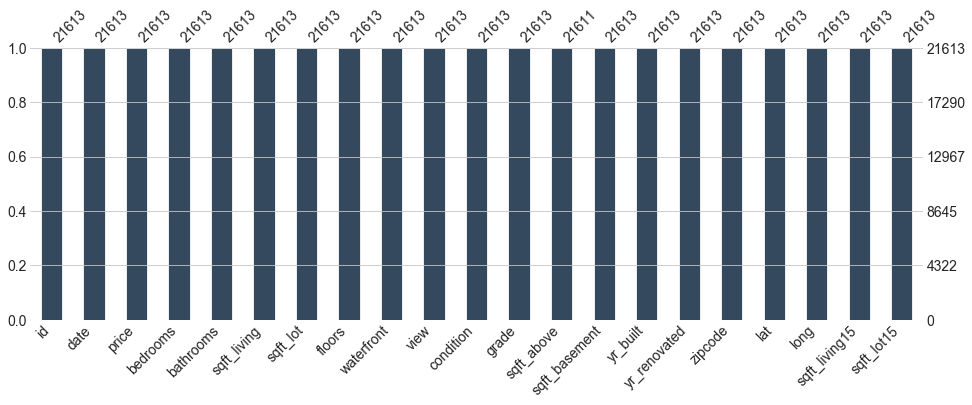

In [4]:
def Data_info(Inp, Only_NaN = False):
    Out = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = Out.join(Inp.isnull().sum().to_frame(name = 'Number of NaN Values'), how='outer')
    Out ['Size'] = Inp.shape[0]
    Out['Percentage'] = np.round(100*(Out['Number of NaN Values']/Inp.shape[0]),2)
    Out.index.name = 'Features'
    if Only_NaN:
        Out = Out.loc[Out['Number of NaN Values']>0]
    return Out

display(Data_info(Data))
_ = msno.bar(Data, figsize=(16,5), fontsize=14, log=False, color="#34495e")

We only have 2 **NaN** values in **sqft_above** columns. Thus,

In [5]:
mylist = np.where(np.isnan(Data['sqft_above']))
mylist = mylist[0].tolist()
display(Data.iloc[mylist,:])

id             date     price  bedrooms  bathrooms  sqft_living  \
10  1736800520  20150403T000000  662500.0         3        2.5         3560   
17  6865200140  20140529T000000  485000.0         4        1.0         1600   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
10      9796     1.0           0     0  ...      8         NaN           1700   
17      4300     1.5           0     0  ...      7         NaN              0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
10      1965             0    98007  47.6007 -122.145           2210   
17      1916             0    98103  47.6648 -122.343           1610   

    sqft_lot15  
10        8925  
17        4300  

[2 rows x 21 columns]

We can see that these listings have less than two floors and sqft above can be regarded as zero.

In [6]:
Data.loc[mylist, 'sqft_above'] = 0

Moreover, we can see that some of the entries have zero as the renovation year. These entries haven't had any renovations apparently.

In [7]:
Data.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

## Data Types

In [8]:
def dtypes_group(Inp):
    Temp = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = pd.DataFrame(index =Temp['Data Type'].unique(), columns = ['Features','Count'])
    for c in Temp['Data Type'].unique():
        Out.loc[Out.index == c, 'Features'] = [Temp.loc[Temp['Data Type'] == c].index.tolist()]
        Out.loc[Out.index == c, 'Count'] = len(Temp.loc[Temp['Data Type'] == c].index.tolist())
    Out.index.name = 'Data Type'
    Out = Out.reset_index(drop = False)
    Out['Data Type'] = Out['Data Type'].astype(str)
    return Out

dType = dtypes_group(Data)
display(dType.style.hide_index())

Moreover, it can be seen that the **date** column has **object** values and we can convert these values to **data time** values.

In [9]:
Data['date'] = Data['date'].apply(lambda x: x[:4]+'/'+x[4:6]+'/'+x[6:8])
Data['date'] = pd.to_datetime(Data.date, format='%Y/%m/%d')

and, adding another column for years

In [10]:
Data.insert(2, 'year', pd.DatetimeIndex(Data.date).year)

We have,

In [11]:
Data.head()

id       date  year     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  2014  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  2014  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  2015  180000.0         2       1.00          770   
3  2487200875 2014-12-09  2014  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0  ...      7      1180.0              0   
1      7242     2.0           0  ...      7      2170.0            400   
2     10000     1.0           0  ...      6       770.0              0   
3      5000     1.0           0  ...      7      1050.0            910   
4      8080     1.0           0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 22 columns]

Saving to a CSV file

In [12]:
Temp = Path.split('.')
Temp = Temp[0] + '_mod.' + Temp[1]
Data.to_csv (Temp, index = None, header=True)

<div class="alert alert-block alert-success">
<font size="+2"><b>
Exploratory Data Analysis
</b></font>
</div>

First of all, the dataset includes information regarding King County house sales from 2014 to 2015. We can create two separate datasets for our analysis.

## The relationship between various attributes and the price

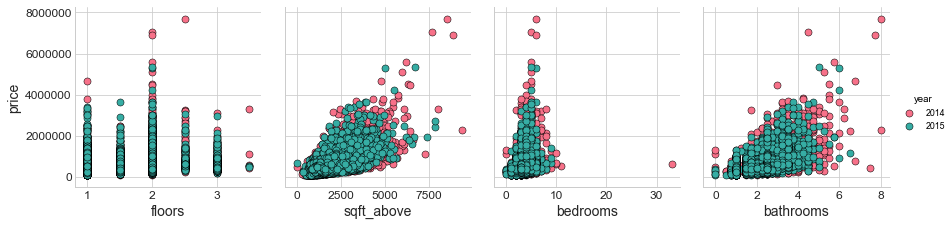

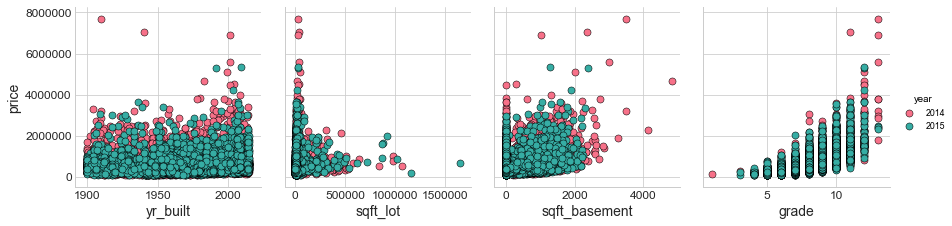

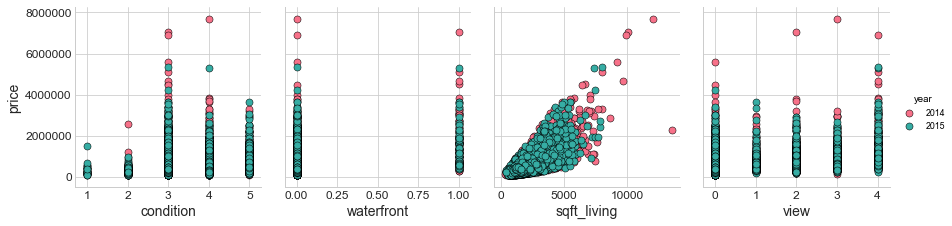

In [13]:
Temp = Data.iloc[:, 3 : 17]
mylist = list(set(Temp)-set(['price','yr_renovated']))
ind = np.arange(0,len(mylist), 4).tolist()
ind.append(len(mylist))
N = len(ind)-1

for i in range(N):
    _ = sns.pairplot(data= Data, hue= 'year', palette="husl",
                     x_vars = mylist[ind[i]:ind[i+1]], y_vars = ['price'], size=3,
                     height=4, plot_kws=dict(s=50, edgecolor="k", linewidth=0.5),
                     diag_kws=dict(shade=True))
    
del N, ind, mylist, Temp

## Average Price by Living Space

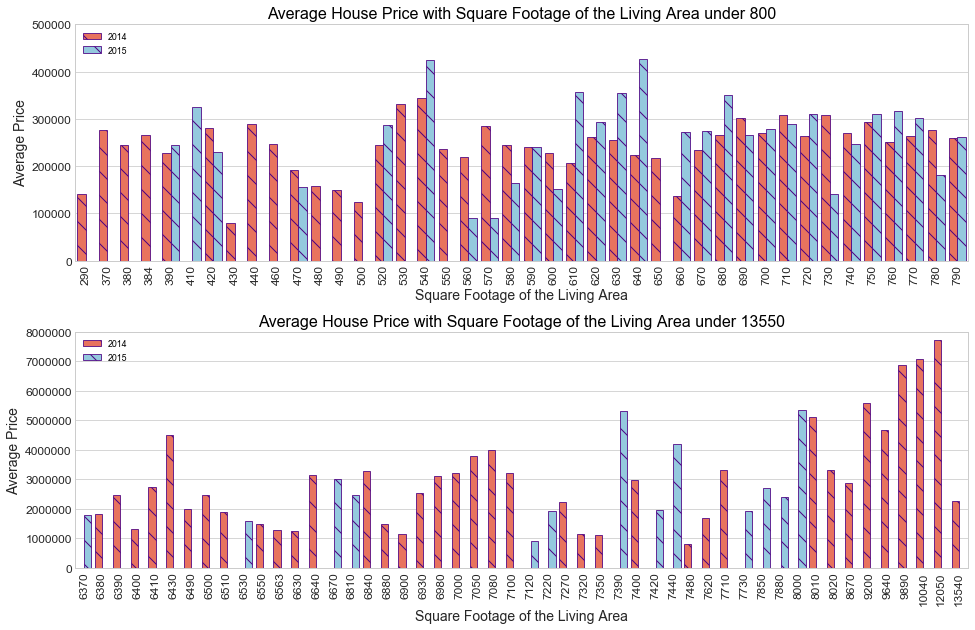

In [14]:
def SentesneCase(x):
    x = x.title()
    List = ['With', 'Top', 'Of', ' A ', 'Under', 'The']
    for w in List:
        x = x.replace(w, w.lower())
    return x

Feat = 'sqft_living'
Temp = SentesneCase(Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])
N = 70
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.head(N), ax = ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 5e5])
_ = ax[0].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.head(N)[Feat].max() +10)), fontsize = 16)
_ = ax[0].legend(loc='upper left')

N = 50
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.tail(N), ax = ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 8e6])
_ = ax[1].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.tail(N)[Feat].max() +10)), fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)
del N, Group, Temp, CP, fig, ax

## Average Price by Lot Space

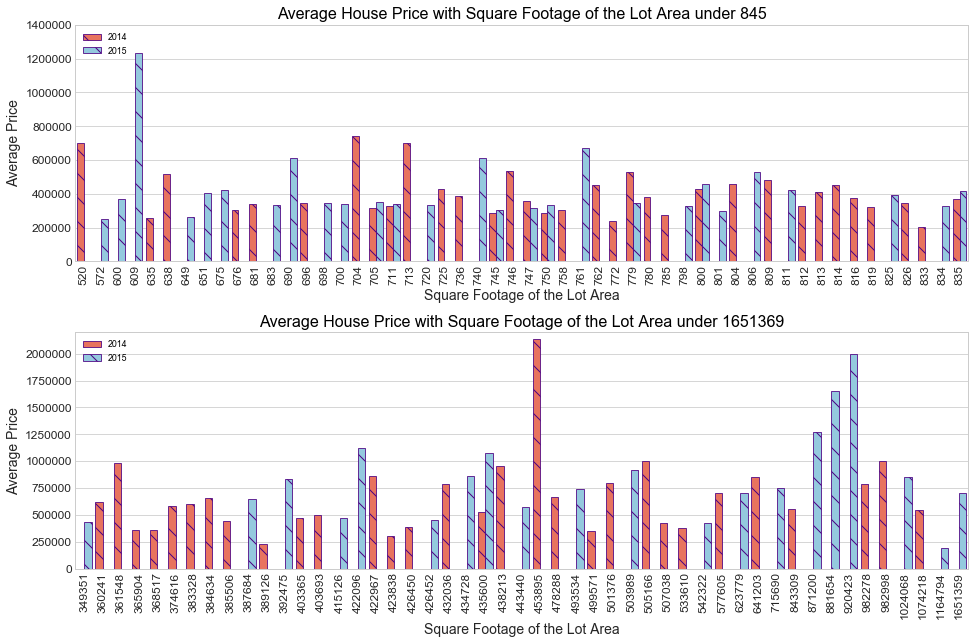

In [15]:
Feat = 'sqft_lot'
Temp = SentesneCase(Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])
N = 60
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.head(N), ax = ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 1.4e6])
_ = ax[0].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.head(N)[Feat].max() +10)), fontsize = 16)
_ = ax[0].legend(loc='upper left')

N = 50
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.tail(N), ax = ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 2.2e6])
_ = ax[1].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.tail(N)[Feat].max() +10)), fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)
del N, Group, Temp, CP, fig, ax

## Average Price by Built Year

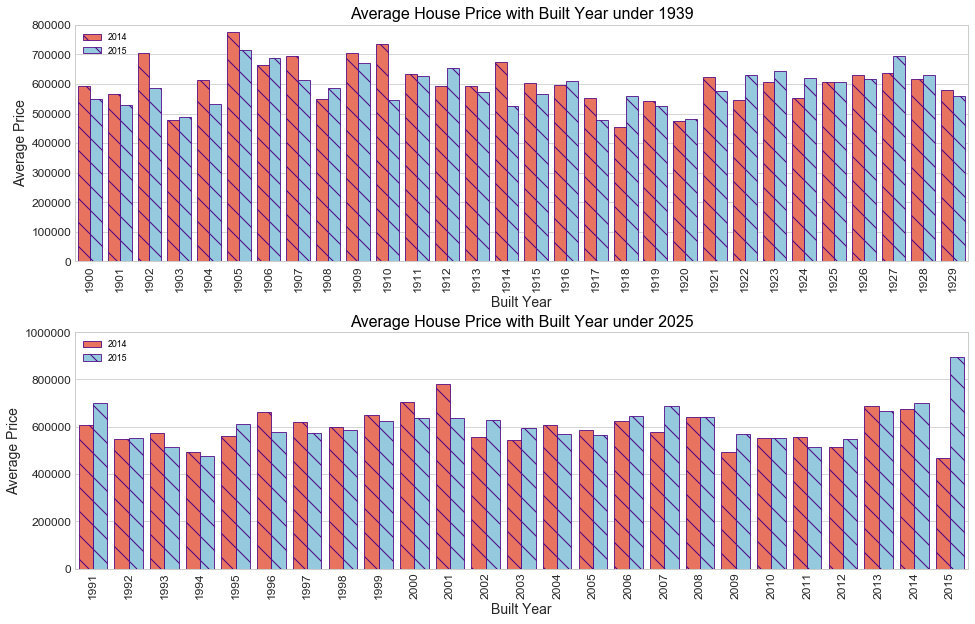

In [16]:
Feat = 'yr_built'
Temp = SentesneCase(Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])
N = 60
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.head(N), ax = ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 8e5])
_ = ax[0].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.head(N)[Feat].max() +10)), fontsize = 16)
_ = ax[0].legend(loc='upper left')

N = 50
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.tail(N), ax = ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 1e6])
_ = ax[1].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.tail(N)[Feat].max() +10)), fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)
# del N, Group, Temp, CP, fig, ax

##  Average Price by the Number Bedrooms and Bathrooms

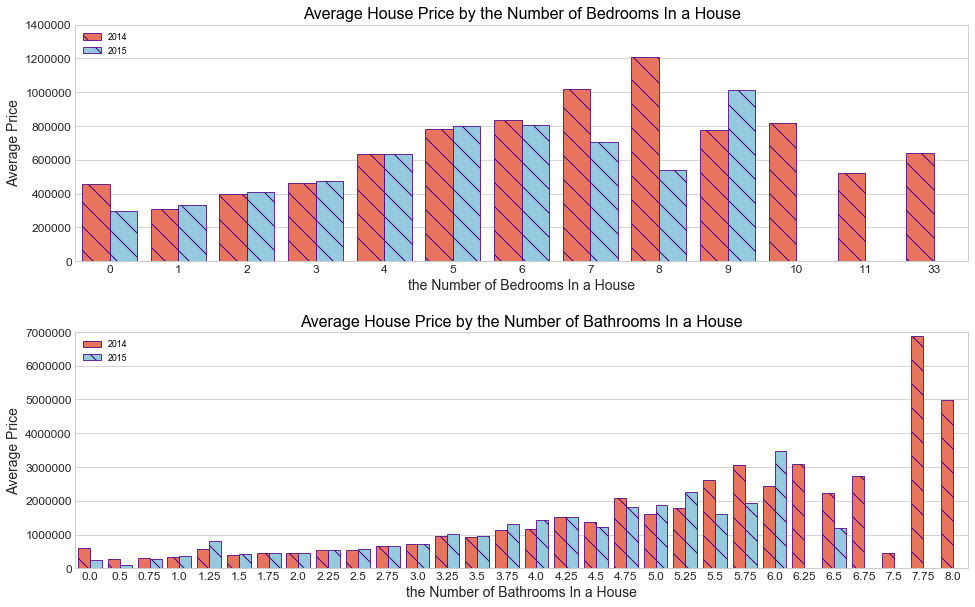

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])

Feat = 'bedrooms'
Temp = SentesneCase(Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group, ax = ax[0])
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 1.4e6])
_ = ax[0].set_title('Average House Price by %s' % Temp, fontsize = 16)
_ = ax[0].legend(loc='upper left')

Feat = 'bathrooms'
Temp = SentesneCase(Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group, ax = ax[1])
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 7e6])
_ = ax[1].set_title('Average House Price by %s' % Temp, fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)

del Group, Temp, CP, fig, ax

##  Average Price by Grade and Condition

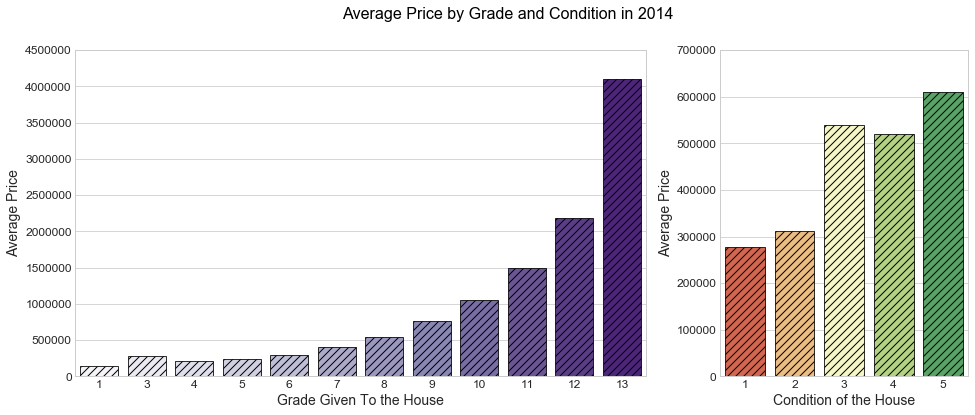

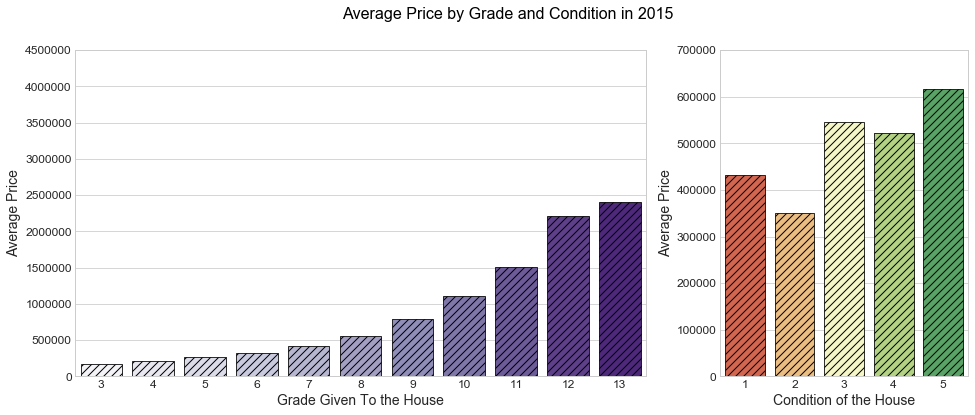

In [18]:
for y in Data.year.unique():
    Group = Data.loc[Data.year == y].groupby(['grade'])['price'].agg({'mean'})
    Group.columns = ['Average Price']
    Group.sort_values(by='grade', inplace = True)

    Group1 = Data.loc[Data.year == y].groupby(['condition'])['price'].agg({'mean'})
    Group1.columns = ['Average Price']
    Group1.sort_values(by='condition', inplace = True)

    fig = plt.figure(figsize=(16, 6), constrained_layout=True)
    gs = fig.add_gridspec(1, 3)
    ax = np.zeros(2, dtype=object)
    ax[0] = fig.add_subplot(gs[:-1])
    ax[1] = fig.add_subplot(gs[-1])
    _ = sns.barplot(ax = ax[0], x="grade", y="Average Price", palette='Purples',
                    edgecolor='k',  hatch="///", data=Group.reset_index(drop = False))
    _ = ax[0].set_ylabel('Average Price')
    _ = ax[0].set_xlabel(SentesneCase(Dict['grade']))
    _ = ax[0].set_ylim([0,4.5e6])

    _ = sns.barplot(ax = ax[1], x="condition", y="Average Price", palette='RdYlGn',
                    edgecolor='k',  hatch="///", data=Group1.reset_index(drop = False))
    _ = ax[1].set_ylabel('Average Price')
    _ = ax[1].set_xlabel(SentesneCase(Dict['condition']))
    _ = ax[1].set_ylim([0,7e5])

    _ = fig.suptitle('Average Price by Grade and Condition in %i' % y, fontsize = 16)
    plt.subplots_adjust(wspace= .3)
    del y, Group, Group1, fig, ax, gs

##  Price and Location

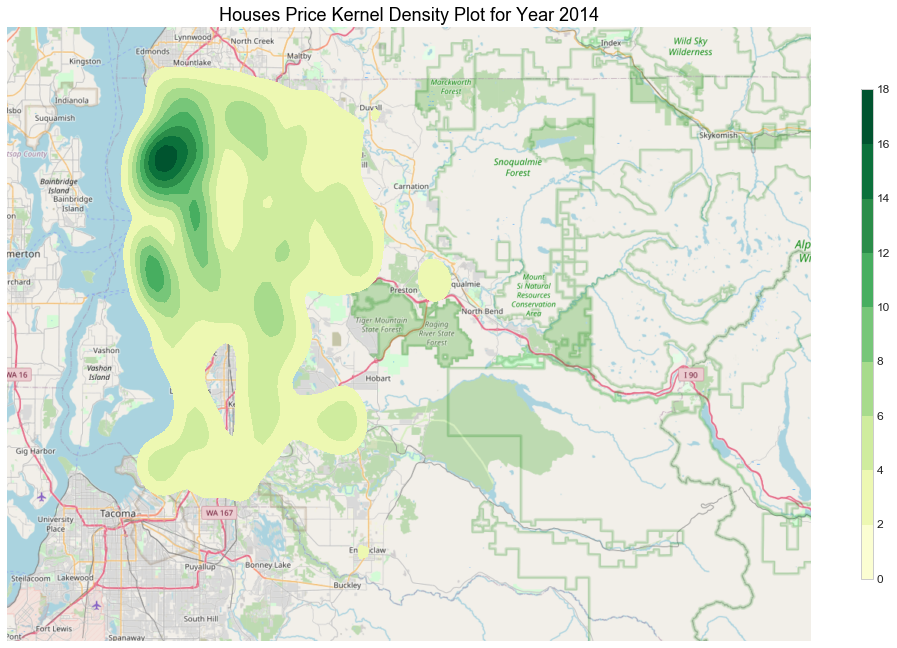

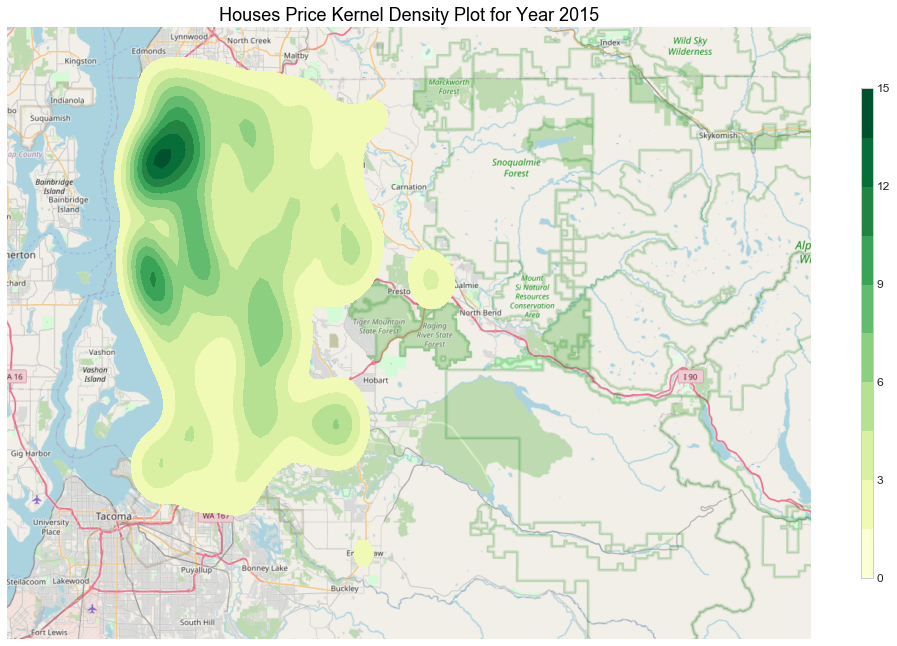

In [19]:
for y in Data.year.unique():
    Group = Data.loc[Data.year == y]      
    geometry = [Point(xy) for xy in zip(Group.long, Group.lat)]
#     crs = {'init':'epsg:4326'}
#     geo_df = gpd.GeoDataFrame(Group, crs = crs, geometry = geometry)
    geo_df = gpd.GeoDataFrame(Group, geometry = geometry)
    Group = geo_df[['price','geometry']]
    ax = gplt.kdeplot(Group, cmap='YlGn', projection=gcrs.WebMercator(), figsize=(18, 18), shade=True,
                  cbar =True, cbar_kws={'shrink': .5, "aspect":40})
#     gplt.pointplot(Group, s=1, color='black', ax=ax)
    cs = gplt.webmap(Group, ax=ax)
    _ = ax.set_title('Houses Price Kernel Density Plot for Year %i' %y, fontsize=18)

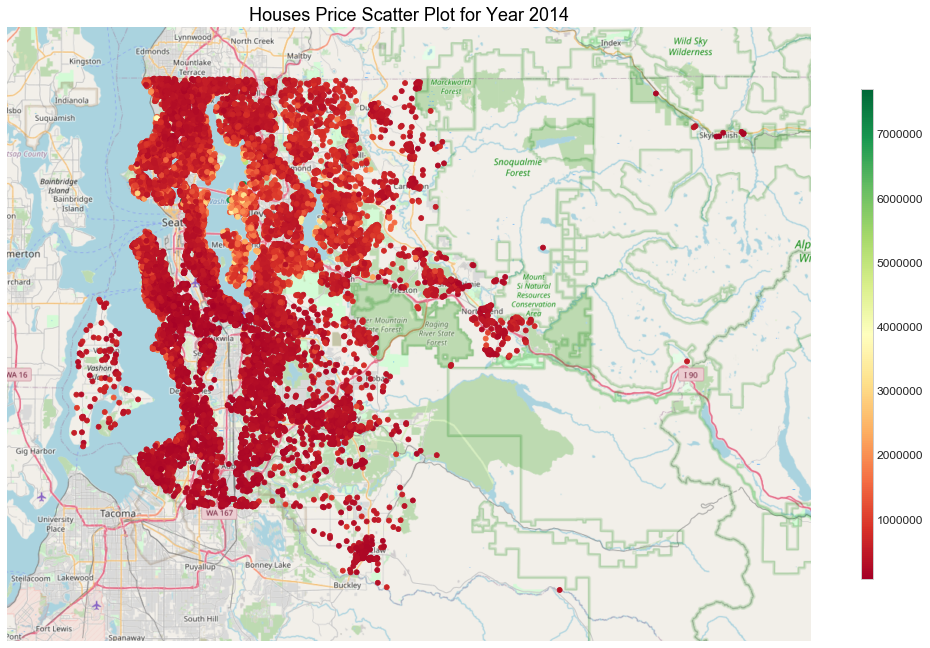

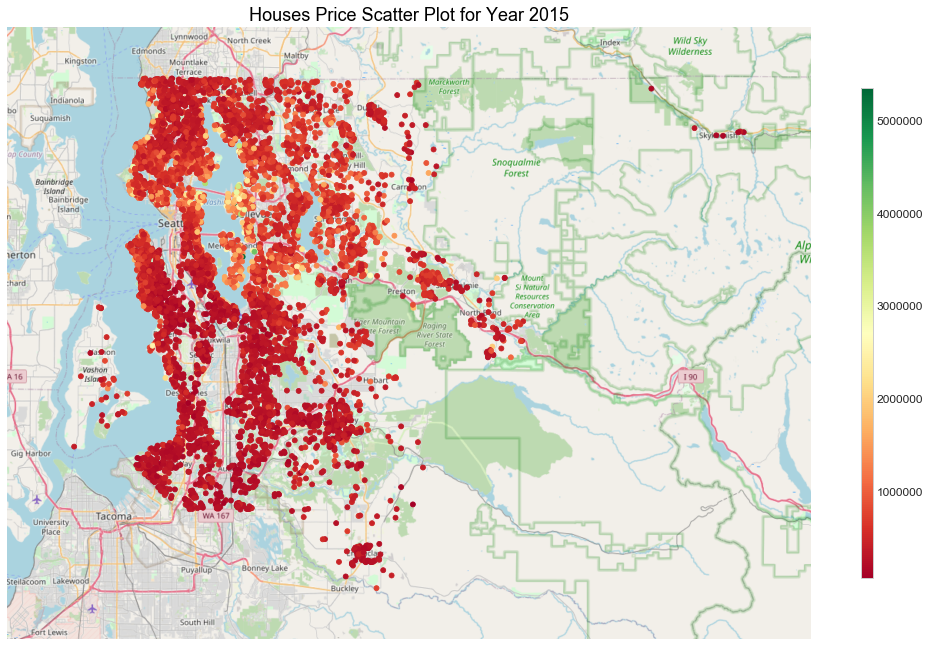

In [20]:
for y in Data.year.unique():
    Group = Data.loc[Data.year == y]      
    geometry = [Point(xy) for xy in zip(Group.long, Group.lat)]
#     crs = {'init':'epsg:4326'}
#     geo_df = gpd.GeoDataFrame(Group, crs = crs, geometry = geometry)
    geo_df = gpd.GeoDataFrame(Group, geometry = geometry)
    Group = geo_df[['price','geometry']]
    ax = gplt.pointplot(Group, hue='price', cmap='RdYlGn',figsize=(18, 18), projection=gcrs.WebMercator(),
                        legend=True, legend_kwargs={'shrink': .5, "aspect":40})
#     gplt.pointplot(Group, s=1, color='black', ax=ax)
    cs = gplt.webmap(Group, ax=ax)
    _ = ax.set_title('Houses Price Scatter Plot for Year %i' %y, fontsize=18)

## The Most Expensive Houses

In [21]:
Top = 15
for y in Data.year.unique():
    Group = Data.loc[Data.year == y].sort_values(by='price', ascending=False).reset_index(drop =True)[:Top]
    m = folium.Map([Group.lat.mean(), Group.long.mean()], zoom_start = 10.5)
    for i in range(len(Group)):
        Inp=Group[i:(i+1)]
        St = '(Value:' + str(Inp.price.values[0])+', Grade:' + str(Inp.grade.values[0]) + ')'
        folium.Marker(location=[Inp.lat.values[0], Inp.long.values[0]], popup = St, 
                      icon=folium.Icon(color='blue',icon='building', prefix='fa') ).add_to(m)
    display(m)

***